In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#read csv file
raw_eqk = pd.read_csv("https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv")


#do some prelim data exploration
raw_eqk.head()

raw_eqk.info

raw_eqk.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
place         object
type          object
dtype: object

In [32]:
#check unique values for type of earthquake

raw_eqk.type.unique


#Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 

eqk = raw_eqk[(raw_eqk['type'] == 'earthquake') & (raw_eqk['mag'] >= 6.5)]

In [34]:
# Overwrite eqk dataframe as a geopandas.GeoDataFrame. HINT: find the CRS of the dataset by looking at the metadata.

eqk = gpd.GeoDataFrame(eqk, # data
                                    # specify geometry column
                                    geometry=gpd.points_from_xy(eqk.longitude, 
                                             eqk.latitude),
                                    # specify CRS
                                    crs='EPSG:4326'
                    )

eqk.head()

,time,latitude,longitude,depth,mag,id,place,type,geometry
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,POINT (167.24900 -13.86330)
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,POINT (-58.92720 14.66820)
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,POINT (82.58640 35.90530)
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake,POINT (167.37210 -15.06910)
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake,POINT (-177.88060 -32.90760)


<AxesSubplot:>

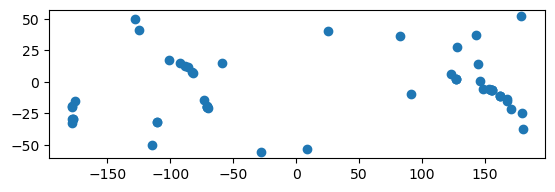

In [35]:
#make a simple plot of eqk 

eqk.plot()

In [36]:
#run the following line 
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


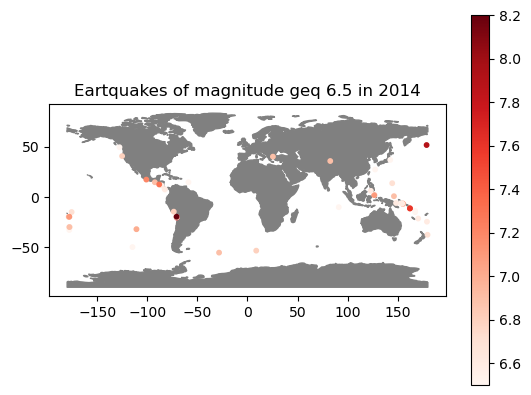

In [50]:
#Create a map of the earthquales of magnitude greater equal to 6.5 across the world in 2014.
#Color the points by the magnitude. This is an example of how it could look like:
fig, ax = plt.subplots()

ax.set_title("Eartquakes of magnitude geq 6.5 in 2014")

# add states 
worldmap.plot(ax=ax,
            color='grey',
            edgecolor = 'grey')

# add electric power plants colored by energy source
eqk.plot(ax=ax, 
                  column='mag', # color points according to primsource value
                  legend=True,    # add legend
                  markersize = 10, # adjust point size
                  cmap='Reds', # this color map has 20 different colors
                  alpha=1)

plt.show()